In [1]:
#importing different libraries

In [2]:
!pip install xgboost

In [3]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from copy import deepcopy
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report , accuracy_score
import joblib as jb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayuresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#importing  models

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier


In [6]:
import joblib
import ipywidgets as widgets
from IPython.display import display


In [7]:
##Loading Dataset

In [8]:
#importing data Which is in tsv form

In [9]:
import pandas as pd
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# Verify if the file exists
file_path ="amazon_alexa.tsv"
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # Load dataset
    df = pd.read_csv(file_path, delimiter='\t')
    df.head()


Current working directory: C:\Users\Mayuresh\Alexa Sentiment Analysis


In [10]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
#Cheking Shape of data

In [12]:
df.shape

(3150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [14]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [15]:
#EDA(Exploratory Data Analysis)

In [16]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [17]:
#Cheking cell that contain null data

In [18]:
df[df['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [19]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [20]:
rating_counts=df['rating'].value_counts()
rating_counts

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

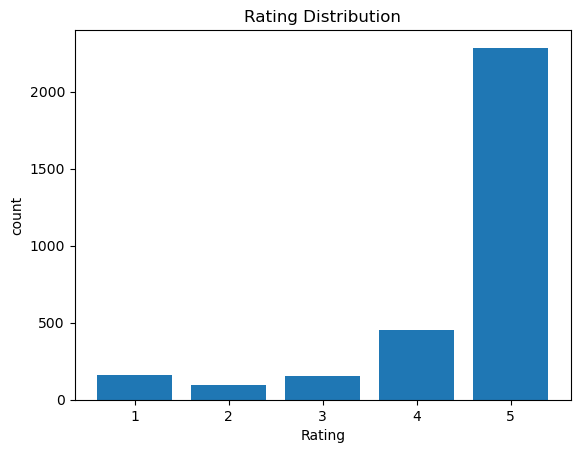

In [21]:
plt.bar(rating_counts.index,rating_counts)
colors = sns.color_palette("viridis", as_cmap=True)
plt.xlabel('Rating')
plt.ylabel('count')
plt.title('Rating Distribution')
plt.show()

In [22]:
#exploring feedback column

In [23]:
feedback_column=df['feedback'].value_counts()
feedback_column

feedback
1    2893
0     256
Name: count, dtype: int64

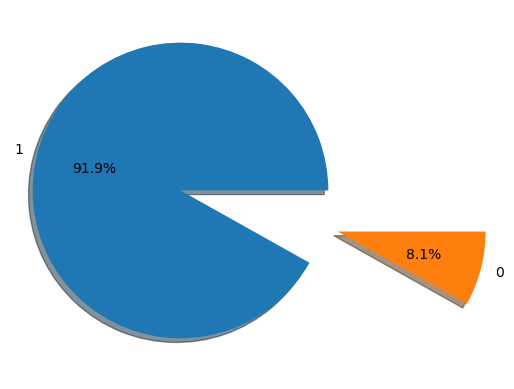

In [24]:
plt.pie(feedback_column,labels=feedback_column.index,explode=[0.1,1.0],shadow=True,autopct='%1.1f%%')
plt.show()

In [25]:
#negative reviews

In [26]:
neg_review=df[df['feedback']==0].iloc[0]['verified_reviews']
print('negative reviews:',neg_review,'\n')

negative reviews: It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals. 



In [27]:
#positive reviews

In [28]:
pos_review=df[df['feedback']==1].iloc[0]['verified_reviews']
print('positive review:',pos_review,'\n')

positive review: Love my Echo! 



In [29]:
#negative rating

In [30]:
neg_rating=df[df['feedback']==0]['rating'].value_counts()
print('Negative Rating:',neg_rating)

Negative Rating: rating
1    161
2     95
Name: count, dtype: int64


In [31]:
#positive raing

In [32]:
pos_rating=df[df['feedback']==1]['rating'].value_counts()
print('Positive Rating',pos_rating)

Positive Rating rating
5    2286
4     455
3     152
Name: count, dtype: int64


In [33]:
#exporing more other college

In [34]:
variation_count=df['variation'].value_counts()
variation_count

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [35]:
#ploting Bar chart of variation

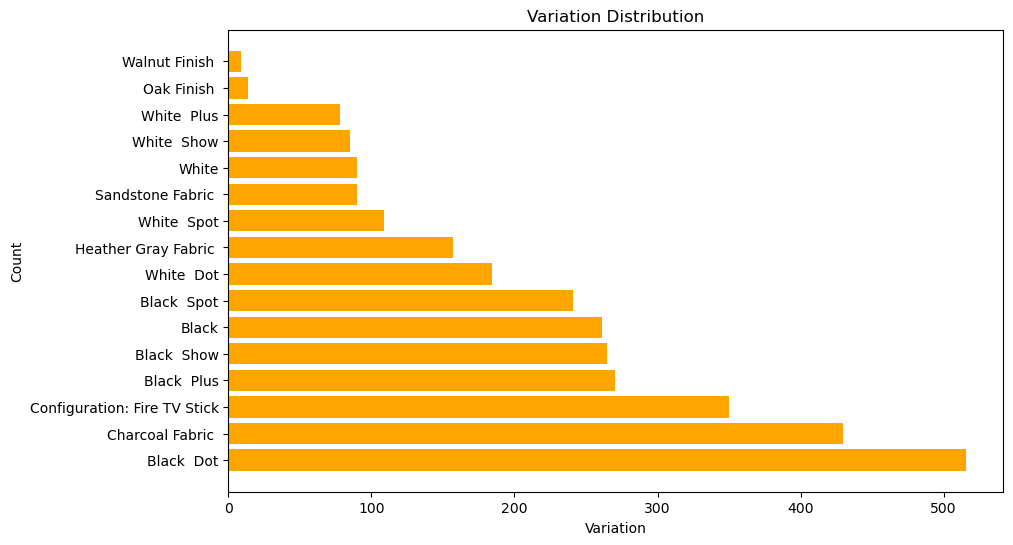

In [36]:
plt.figure(figsize=(10,6))
plt.barh(variation_count.index,variation_count,color='orange')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.title('Variation Distribution')
plt.show()

In [37]:
#Average rating

In [38]:
average_rating=df.groupby('variation')['rating'].mean().sort_values(ascending=True)
print('average Rating',average_rating)

average Rating variation
White                           4.166667
Black                           4.233716
White  Show                     4.282353
Black  Spot                     4.311203
White  Spot                     4.311927
Sandstone Fabric                4.355556
White  Plus                     4.358974
Black  Plus                     4.370370
White  Dot                      4.423913
Black  Dot                      4.453488
Black  Show                     4.490566
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Charcoal Fabric                 4.730233
Oak Finish                      4.857143
Walnut Finish                   4.888889
Name: rating, dtype: float64


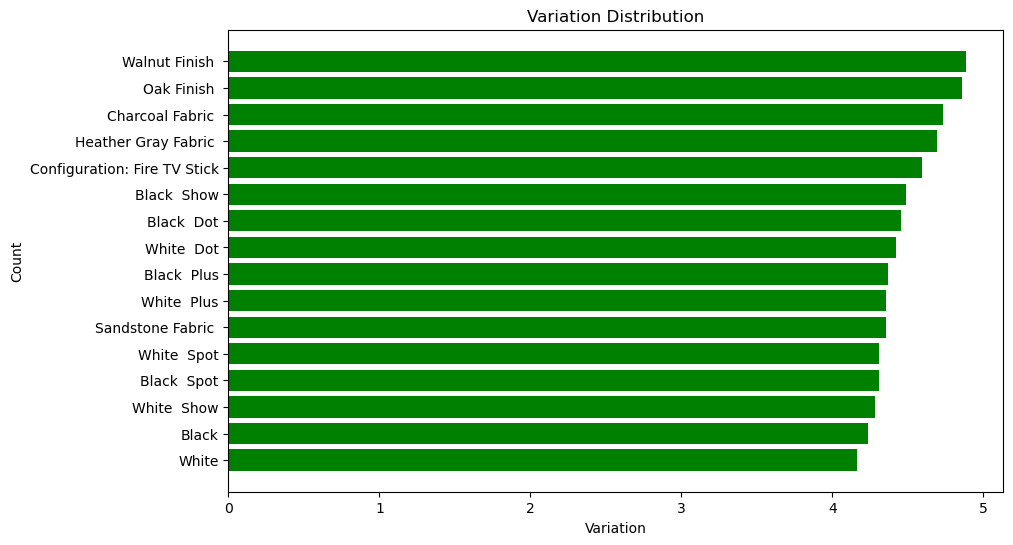

In [39]:
plt.figure(figsize=(10,6))
plt.barh(average_rating.index,average_rating,color='Green')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.title('Variation Distribution')
plt.show()

In [40]:
#verifying lenth of reviews

In [41]:
lengths=df['verified_reviews'].apply(len)
print(df['verified_reviews'][:1])
print(lengths[0])
print(pd.DataFrame(lengths).describe())

0    Love my Echo!
Name: verified_reviews, dtype: object
13
       verified_reviews
count       3149.000000
mean         132.090187
std          182.114569
min            1.000000
25%           30.000000
50%           74.000000
75%          165.000000
max         2851.000000


In [42]:
#ploting lenghts

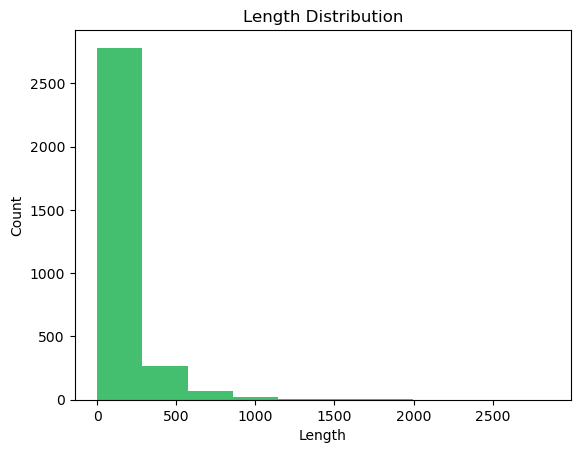

In [43]:
colors = sns.color_palette("viridis", as_cmap=True)
plt.hist(lengths, color=colors(0.7))
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Distribution')
plt.show()

In [44]:
#Creating word cloud

In [45]:
#wc=WordCloud(background_color='white',width=800,height=400,max_words=50)

In [46]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
    colormap='viridis',
    prefer_horizontal=0.9,
    relative_scaling=0.5,
    scale=3,
    random_state=42
)

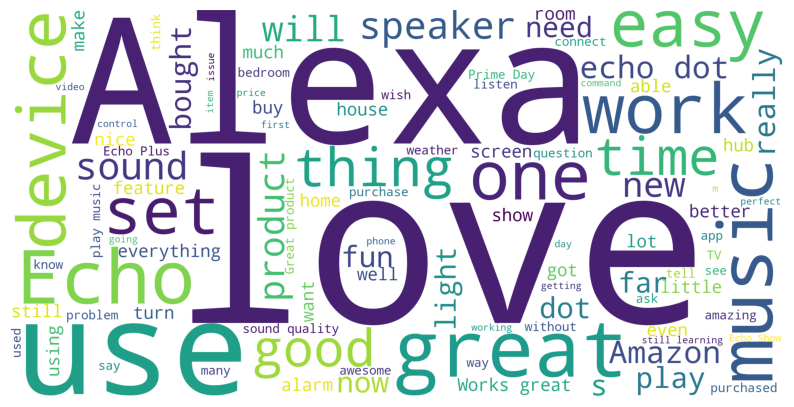

In [47]:
reviews=' '.join(review for review in df['verified_reviews'])
plt.figure(figsize=(10,6))
plt.imshow(wordcloud.generate(reviews))
plt.axis('off')
plt.show()

In [48]:
#visualizing word cloud using negative review

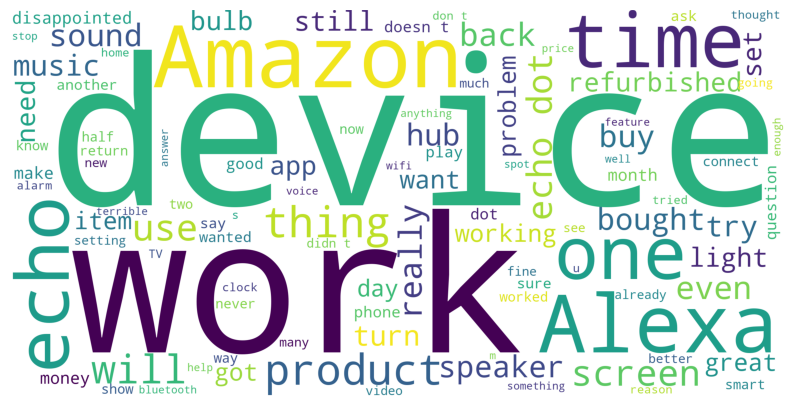

In [49]:
neg_review=' '.join(review for review in df[df['feedback']==0]['verified_reviews'])
plt.figure(figsize=(10,6))
plt.imshow(wordcloud.generate(neg_review))
plt.axis('off')
plt.show()

In [50]:
#visualizing word cloud using positiove review

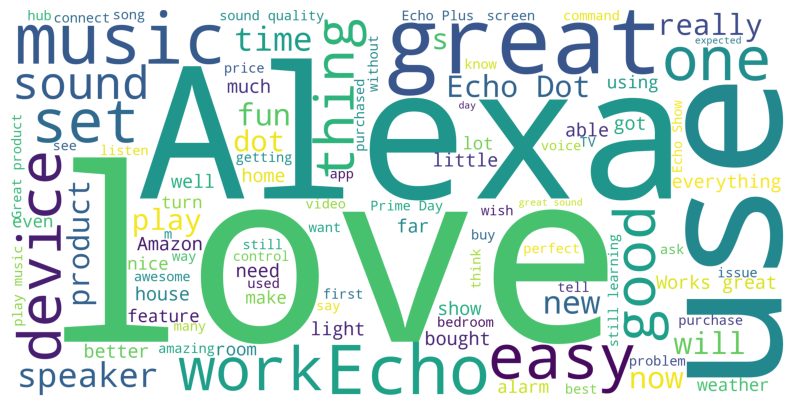

In [51]:
neg_review=' '.join(review for review in df[df['feedback']==1]['verified_reviews'])
plt.figure(figsize=(10,6))
plt.imshow(wordcloud.generate(neg_review))
plt.axis('off')
plt.show()

In [52]:
#Data Preprocessing

In [53]:
df_processed = deepcopy(df)

In [54]:
#stemming data

In [55]:
# Create function to take the content and stemmer and stem it
def stemming(content, stemmer):
    # Remove non-alphabetical characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)

    # Convert sentences into lowercase sentences and split each into words
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()

    # Prepare stop words
    stop_words = set(stopwords.words('english'))
    # Stem words and remove stop words
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if word not in stop_words]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [56]:
df_processed['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [57]:
stemmer = PorterStemmer()

In [58]:
#appying porter stemmer to all text column

In [59]:
# Apply stemming function to the 'text' column in DataFrame
df_processed['verified_reviews'] = df_processed['verified_reviews'].apply(lambda x: stemming(x, stemmer))

In [60]:
df['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [61]:
#vectorize data

In [62]:
vectorizer=CountVectorizer(max_features=2500)

In [63]:
X=vectorizer.fit_transform(df_processed['verified_reviews']).toarray()

In [64]:
print(X[:3])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
#spliting data

In [66]:
Y=df_processed['feedback']
print(f'X shape {X}')
print(f'y shape {Y}')

X shape [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y shape 0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3149, dtype: int64


In [67]:
#spliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,train_size=0.7,random_state=42)

In [68]:
print(f'x_train:{x_train.shape}')
print(f'x_test:{x_test.shape}')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

x_train:(2204, 2500)
x_test:(945, 2500)
y_train:(2204,)
y_test:(945,)


In [69]:
#scalling data

In [70]:
scalar=MinMaxScaler()
X_train_scaled=scalar.fit_transform(x_train)
X_test_scaled=scalar.transform(x_test)

In [71]:
#Modeling

In [72]:
def fit_predict(classifier,x_train , y_train, x_test, y_test):
  classifier.fit(x_train,y_train)
  train_score=classifier.score(x_train,y_train)
  test_score=classifier.score(x_test,y_test)
  print(f'Train Score:{train_score},Test Score:{test_score}')

  # making prediction
  test_prediction=classifier.predict(x_test)
  #getting accuracy, confusion matrix and classification report
  accuracy=accuracy_score(y_test,test_prediction)
  cf_matrix=confusion_matrix(y_test,test_prediction)
  cl_report=classification_report(y_test,test_prediction)
  # Plot confusion matrix
  plt.figure(figsize=(7,7))
  sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

    # Show accuracy and classification report
  print(f'accuracy: {accuracy}\nclassification report:\n{cl_report}', '\n\n')

  return classifier


In [73]:
# Put all required models that can fit this problem
models = {
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC(),
    'XGBClassifier':XGBClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

LogisticRegression:

Train Score:0.9632486388384754,Test Score:0.9259259259259259


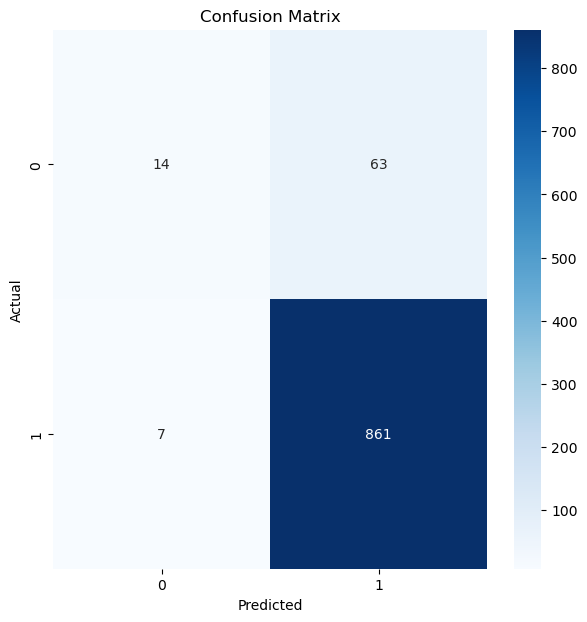

accuracy: 0.9259259259259259
classification report:
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        77
           1       0.93      0.99      0.96       868

    accuracy                           0.93       945
   macro avg       0.80      0.59      0.62       945
weighted avg       0.91      0.93      0.91       945
 


LinearSVC:

Train Score:0.9891107078039928,Test Score:0.9333333333333333


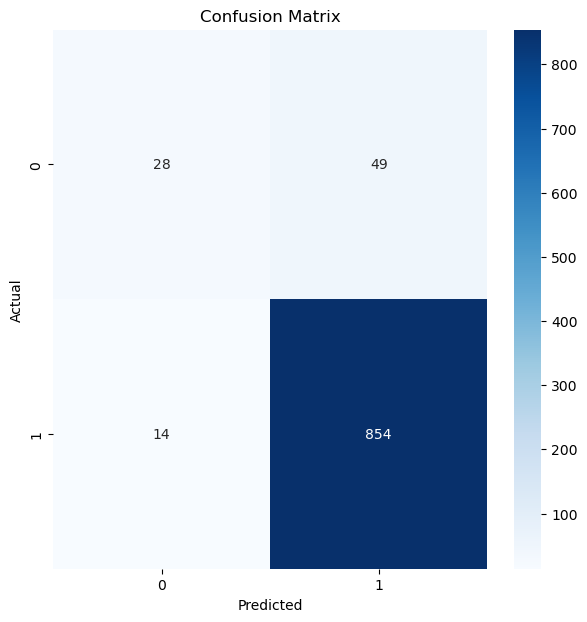

accuracy: 0.9333333333333333
classification report:
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        77
           1       0.95      0.98      0.96       868

    accuracy                           0.93       945
   macro avg       0.81      0.67      0.72       945
weighted avg       0.92      0.93      0.92       945
 


XGBClassifier:

Train Score:0.9732304900181489,Test Score:0.9343915343915344


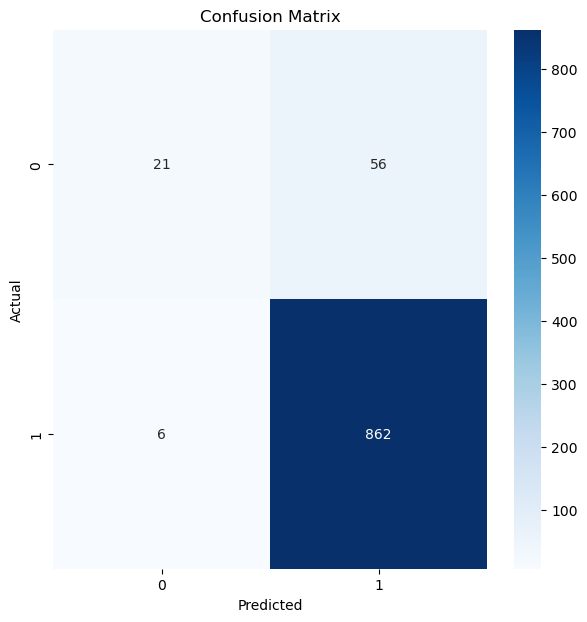

accuracy: 0.9343915343915344
classification report:
              precision    recall  f1-score   support

           0       0.78      0.27      0.40        77
           1       0.94      0.99      0.97       868

    accuracy                           0.93       945
   macro avg       0.86      0.63      0.68       945
weighted avg       0.93      0.93      0.92       945
 


DecisionTreeClassifier:

Train Score:0.9927404718693285,Test Score:0.9216931216931217


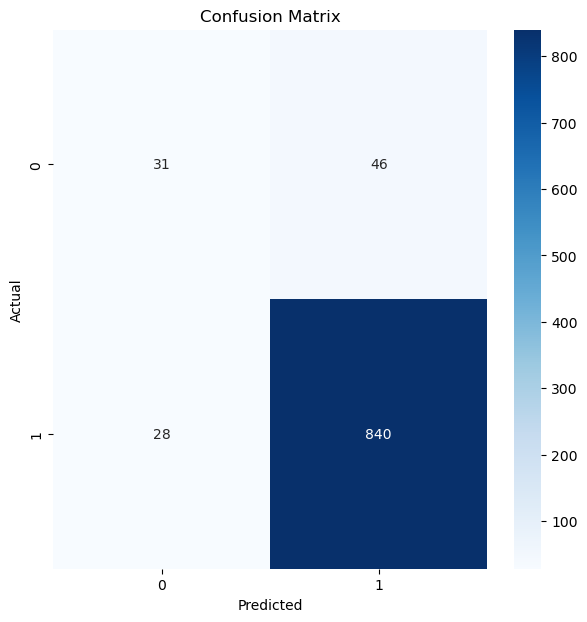

accuracy: 0.9216931216931217
classification report:
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        77
           1       0.95      0.97      0.96       868

    accuracy                           0.92       945
   macro avg       0.74      0.69      0.71       945
weighted avg       0.91      0.92      0.92       945
 


RandomForestClassifier:

Train Score:0.9927404718693285,Test Score:0.9365079365079365


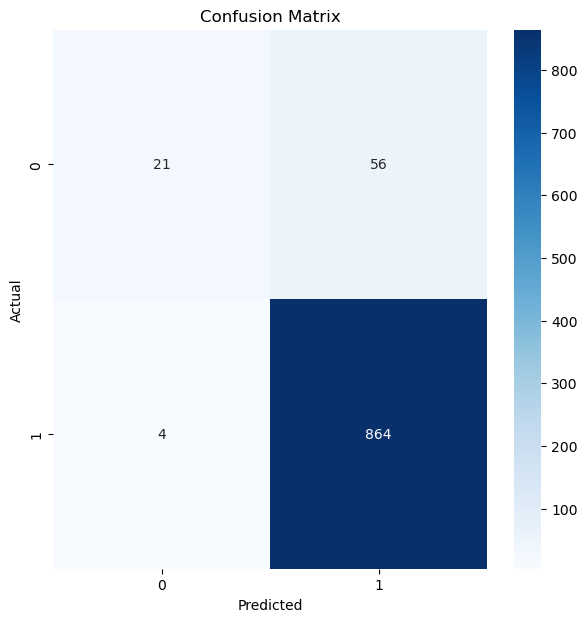

accuracy: 0.9365079365079365
classification report:
              precision    recall  f1-score   support

           0       0.84      0.27      0.41        77
           1       0.94      1.00      0.97       868

    accuracy                           0.94       945
   macro avg       0.89      0.63      0.69       945
weighted avg       0.93      0.94      0.92       945
 


GradientBoostingClassifier:

Train Score:0.9578039927404719,Test Score:0.9216931216931217


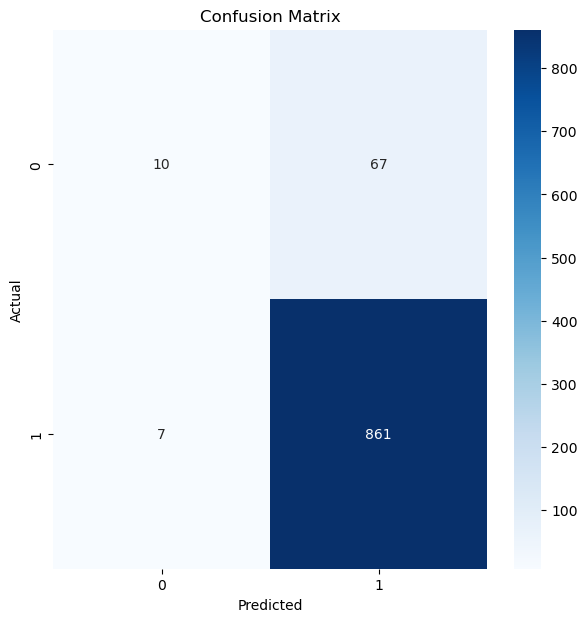

accuracy: 0.9216931216931217
classification report:
              precision    recall  f1-score   support

           0       0.59      0.13      0.21        77
           1       0.93      0.99      0.96       868

    accuracy                           0.92       945
   macro avg       0.76      0.56      0.59       945
weighted avg       0.90      0.92      0.90       945
 




In [74]:
trained_models = {}
for name, model in models.items():
    print(f'{name}:\n')
    model = fit_predict(model, X_train_scaled, y_train, X_test_scaled, y_test)
    trained_models[name] = deepcopy(model)

In [75]:
# Access Decision Tree Classifier
DecisionTreeClassifier = trained_models['DecisionTreeClassifier']

# Save the objects
jb.dump(DecisionTreeClassifier, 'decisiontree.sav')
jb.dump(scalar, 'minmaxscaler.sav')
jb.dump(vectorizer, 'vectorizer.sav')

['vectorizer.sav']